In [1]:
import numpy as np
import matplotlib.pyplot as plt

from izhikevich_rnn import Izhikevich

In [5]:
network = Izhikevich(N=2000, T=2000, I_BIAS=1000, dt=4e-2, p=.1)
voltage_trace = network.render(n_neurons=10)

100%|██████████| 50000/50000 [00:07<00:00, 7028.30it/s] 


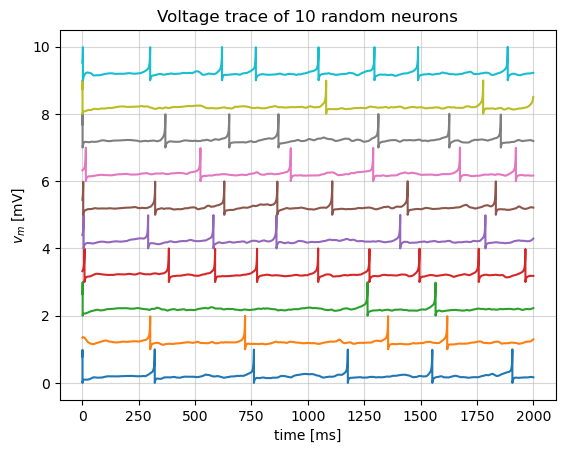

In [6]:
n_neurons = voltage_trace.shape[-1]
new_v = np.zeros((n_neurons, network.time.size))
for i in range(n_neurons):
    new_v[i] = (voltage_trace[:, i] - network.v_reset) / (network.v_peak - network.v_reset) + i

plt.plot(network.time, new_v.T)
plt.grid(alpha=.5)
plt.xlabel("time [ms]")
plt.ylabel(r"$v_m$ [mV]")
plt.title("Voltage trace of 10 random neurons")
plt.savefig(f"img/iz_voltage_trace_{network._N}_{network._T}.jpg", bbox_inches="tight")
plt.show()

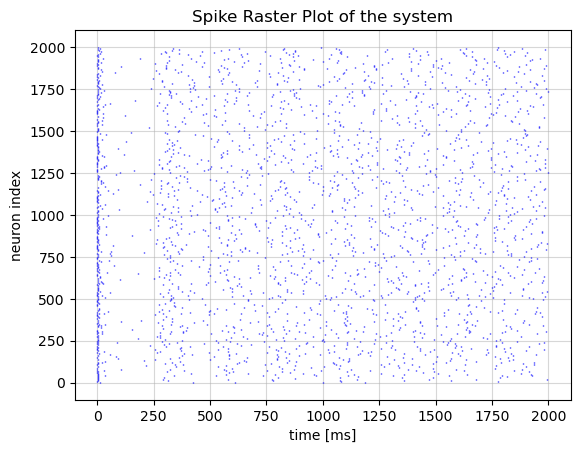

In [7]:
plt.eventplot(network.tspike, linewidths=1, linelengths=1, colors='b')
plt.xlabel("time [ms]")
plt.ylabel("neuron index")
plt.title("Spike Raster Plot of the system")
plt.grid(alpha=.5)
plt.savefig(f"img/iz_rasterplot_{network._N}_{network._T}.jpg", bbox_inches="tight")
plt.show()